In [1]:
import matplotlib.pyplot as plt

import xgi

In [2]:
H_enron = xgi.load_xgi_data("email-enron")


In [3]:
print(f"The hypergraph has {H_enron.num_nodes} nodes and {H_enron.num_edges} edges")
print(H_enron)


The hypergraph has 148 nodes and 10885 edges
Hypergraph named email-Enron with 148 nodes and 10885 hyperedges


In [4]:
print("The first 10 node IDs are:")
print(list(H_enron.nodes)[:10])
print("The first 10 edge IDs are:")
print(list(H_enron.edges)[:10])
print("The attributes of node '4' are")
print(H_enron.nodes["4"])
print("The attributes of edge '6' are")
print(H_enron.edges["6"])

The first 10 node IDs are:
['4', '1', '117', '129', '51', '41', '65', '107', '122', '29']
The first 10 edge IDs are:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
The attributes of node '4' are
{'name': 'robert.badeer@enron.com'}
The attributes of edge '6' are
{'timestamp': '2000-02-22T08:07:00'}


In [ ]:
edges_dictionary = H_enron.edges.members(dtype=dict)
print(list(edges_dictionary.items())[:5])

In [5]:
xgi.is_connected(H_enron)

False

In [6]:
isolated_nodes = H_enron.nodes.isolates()
print("Number of isolated nodes: ", len(isolated_nodes))
duplicated_edges = H_enron.edges.duplicates()
print("Number of duplicated edges: ", len(duplicated_edges))

Number of isolated nodes:  5
Number of duplicated edges:  9371


In [7]:
H_enron_cleaned = H_enron.cleanup(
    multiedges=False, singletons=False, isolates=False, relabel=True, in_place=False
)

print(H_enron_cleaned)

Hypergraph named email-Enron with 143 nodes and 1459 hyperedges


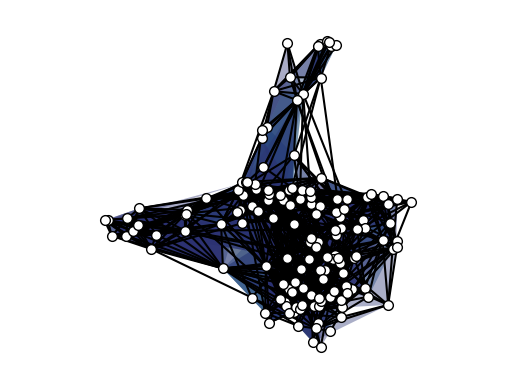

In [8]:
xgi.draw(H_enron_cleaned)

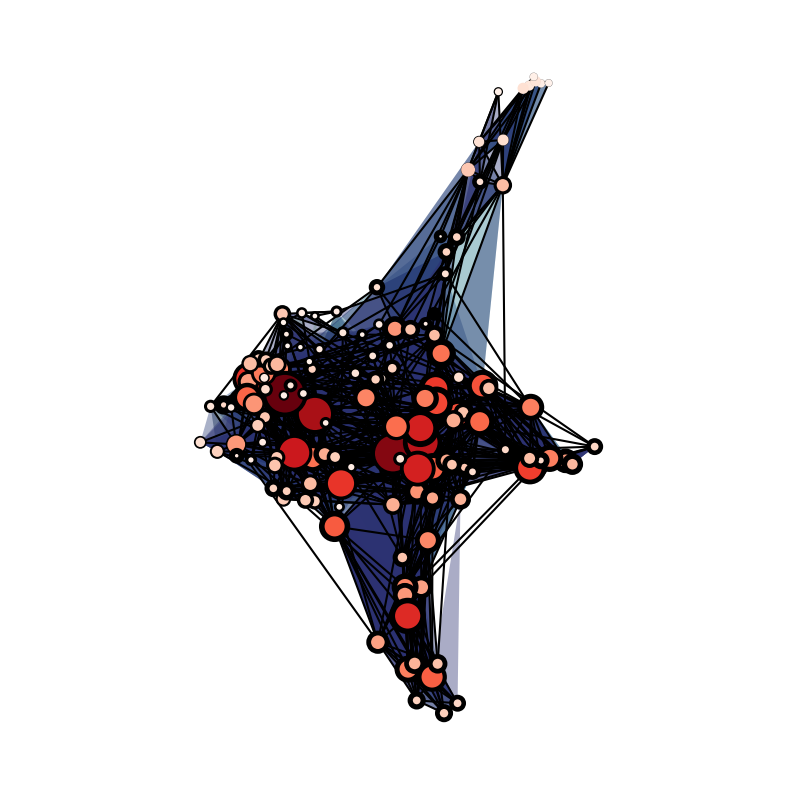

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
xgi.draw(
    H_enron_cleaned,
    node_size=H_enron_cleaned.nodes.degree,
    node_lw=H_enron_cleaned.nodes.average_neighbor_degree,
    node_fc=H_enron_cleaned.nodes.degree,
    ax=ax,
);

In [21]:
import numpy as np
import xgi
from scipy.sparse import load_npz


# Load the .npz file
data = load_npz('../Data/hypergraphs/DGIDB_HumanNet/neighbor/bipolar_k=10_h=1/hypergraph_incidence_matrix_binary.npz')


# Assume the incidence matrix is stored under the key 'incidence_matrix'
incidence_matrix = data
# Convert to hypergraph
H = xgi.from_incidence_matrix(incidence_matrix)

In [22]:
isolated_nodes = H.nodes.isolates()
print("Number of isolated nodes: ", len(isolated_nodes))
duplicated_edges = H.edges.duplicates()
print("Number of duplicated edges: ", len(duplicated_edges))

Number of isolated nodes:  0
Number of duplicated edges:  375


In [23]:
H_clean = H.cleanup(
    multiedges=False, singletons=False, isolates=False, relabel=True, in_place=False
)

print(H_clean)

Unnamed Hypergraph with 2983 nodes and 1397 hyperedges


(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x22bb2765910>,
  <matplotlib.collections.PatchCollection at 0x22bae3abd40>))

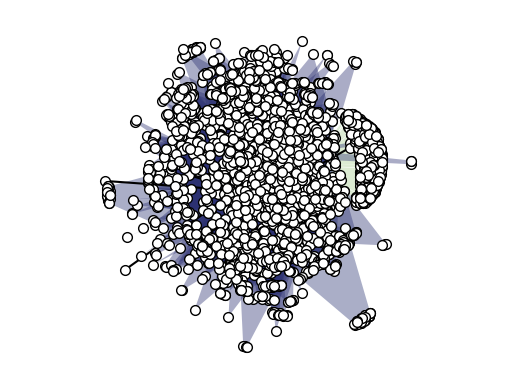

In [24]:
xgi.draw(H_clean)

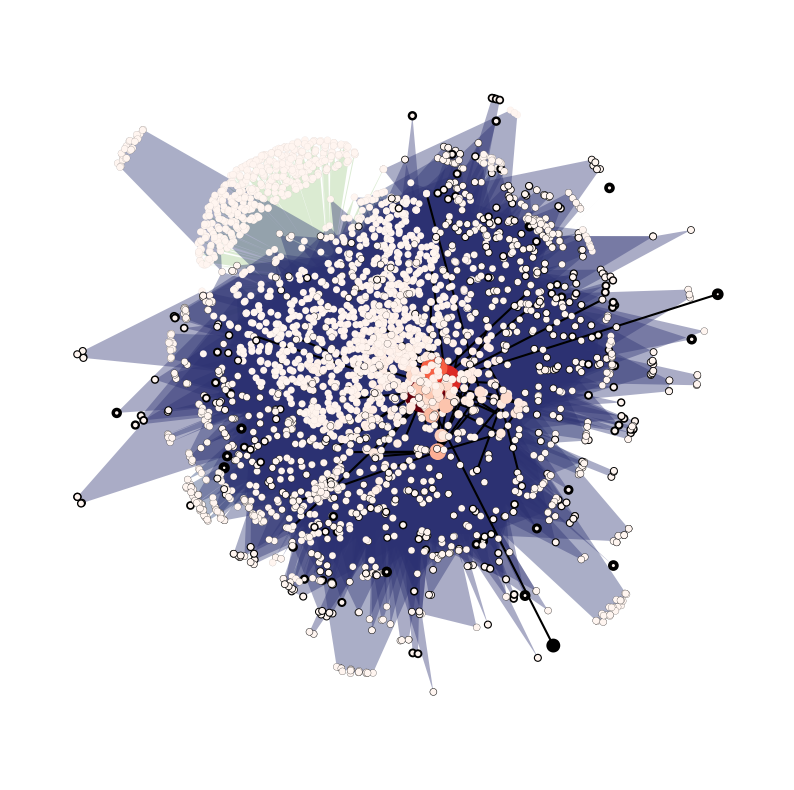

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
xgi.draw(
    H_clean,
    node_size=H_clean.nodes.degree,
    node_lw=H_clean.nodes.average_neighbor_degree,
    node_fc=H_clean.nodes.degree,
    ax=ax,
);